**CHEM E 545 Midterm Exam** Please put team name in the submisson (.ipynb file). Run your notebook so that your outputs are visible and comment throughout your code. **(80 points)**

In this project, you will develop a supervised machine learning model to predict the Gibbs free energy of solvation (ΔG).  ΔG is a crucial property for modeling various chemical processes, including electrochemistry and drug delivery systems.  While traditional methods like quantum mechanics and molecular dynamics have been used extensively for predicting ΔG, machine learning has recently emerged as a popular alternative.  By establishing relationships between molecular structure and activity, machine learning models can effectively predict thermodynamic properties.  Your focus will be on building generalizable machine learning models for ΔG prediction.  Furthermore, you will perform feature selection to identify the most influential molecular descriptors.

**Question 1** Begin by loading the data and separating it into features (X) and target variable (y).  Handle any missing values by replacing them with zero.  Next, preprocess the data in preparation for machine learning.  Briefly explain the chosen preprocessing method and the rationale behind its selection.  Use a random state of 42 for any processes requiring randomization. **(10 points)**

In [1]:
import numpy as np

# Load and explore df

In [3]:
import pandas as pd
df = pd.read_csv('Gibbs_predictor_545_data_final_2.csv')

In [3]:
# 214 columns! including the target column 'gibbs_free_energy'
df.columns

Index(['Solvent_Type', 'gibbs_free_energy', 'solvent_topo_mol_connectivity',
       'solvent_mol_complexity', 'connectivity_index_order0',
       'connectivity_index_order0n', 'connectivity_index_order0v',
       'connectivity_index_order1', 'connectivity_index_order1n',
       'connectivity_index_order1v',
       ...
       'eState_and_area_index1_solute_', 'eState_and_area_index10_solute_',
       'eState_and_area_index2_solute_', 'eState_and_area_index3_solute_',
       'eState_and_area_index4_solute_', 'eState_and_area_index5_solute_',
       'eState_and_area_index6_solute_', 'eState_and_area_index7_solute_',
       'eState_and_area_index8_solute_', 'eState_and_area_index9_solute_'],
      dtype='object', length=214)

In [4]:
# how many columns are non-numeric?
df.select_dtypes(exclude='number').columns

Index(['Solvent_Type'], dtype='object')

In [6]:
# count number of nan
df.isna().sum().sum() #isna and isnull do the same thing

np.int64(156)

In [7]:
df[df.columns[0]].info() #info of just the first column

<class 'pandas.core.series.Series'>
RangeIndex: 6239 entries, 0 to 6238
Series name: Solvent_Type
Non-Null Count  Dtype 
--------------  ----- 
6239 non-null   object
dtypes: object(1)
memory usage: 48.9+ KB


In [8]:
df[df.columns[0]].isna().sum()

np.int64(0)

In [9]:
df[df.columns[:10]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6239 entries, 0 to 6238
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Solvent_Type                   6239 non-null   object 
 1   gibbs_free_energy              6239 non-null   float64
 2   solvent_topo_mol_connectivity  6239 non-null   float64
 3   solvent_mol_complexity         6239 non-null   float64
 4   connectivity_index_order0      6239 non-null   float64
 5   connectivity_index_order0n     6239 non-null   float64
 6   connectivity_index_order0v     6239 non-null   float64
 7   connectivity_index_order1      6239 non-null   float64
 8   connectivity_index_order1n     6239 non-null   float64
 9   connectivity_index_order1v     6239 non-null   float64
dtypes: float64(9), object(1)
memory usage: 487.6+ KB


In [10]:
df[df.columns[df.dtypes == 'object']].value_counts()  # See distribution

Solvent_Type                   
Organic oxygen compounds           1460
Hydrocarbons                       1127
Organic acids and derivatives       804
Benzenoids & Organo-N-S comp        775
Water                               642
Organohalogen compounds             631
Organoheterocyclic compounds        576
Lipids and lipid-like molecules     224
Name: count, dtype: int64

In [11]:
# let's find what column(s) those nan are in
for col in df.columns:
    if df[col].isna().sum() > 0:
        print(df[col].info())

<class 'pandas.core.series.Series'>
RangeIndex: 6239 entries, 0 to 6238
Series name: solute_max_abs_partial_charge
Non-Null Count  Dtype  
--------------  -----  
6200 non-null   float64
dtypes: float64(1)
memory usage: 48.9 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 6239 entries, 0 to 6238
Series name: solute_max_partial_charge
Non-Null Count  Dtype  
--------------  -----  
6200 non-null   float64
dtypes: float64(1)
memory usage: 48.9 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 6239 entries, 0 to 6238
Series name: solute_min_abs_part_charge
Non-Null Count  Dtype  
--------------  -----  
6200 non-null   float64
dtypes: float64(1)
memory usage: 48.9 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 6239 entries, 0 to 6238
Series name: solute_min_charge
Non-Null Count  Dtype  
--------------  -----  
6200 non-null   float64
dtypes: float64(1)
memory usage: 48.9 KB
None


In [12]:
# ALL the columns with Nan are related to solute charge
systematic_missing = df[df['solute_min_charge'].isna()][['solute_min_charge',
                                 'solute_min_abs_part_charge',
                                 'solute_max_partial_charge',
                                 'solute_max_abs_partial_charge']]

In [13]:
systematic_missing

,solute_min_charge,solute_min_abs_part_charge,solute_max_partial_charge,solute_max_abs_partial_charge
172,NaN,NaN,NaN,NaN
377,NaN,NaN,NaN,NaN
596,NaN,NaN,NaN,NaN
1008,NaN,NaN,NaN,NaN
1061,NaN,NaN,NaN,NaN
1146,NaN,NaN,NaN,NaN
1258,NaN,NaN,NaN,NaN
1265,NaN,NaN,NaN,NaN
1322,NaN,NaN,NaN,NaN
1686,NaN,NaN,NaN,NaN


In [14]:
systematic_missing.shape

(39, 4)

In [15]:
# So if a row is Nan in one of those columns it is nan in ALL of those columns
156/39

4.0

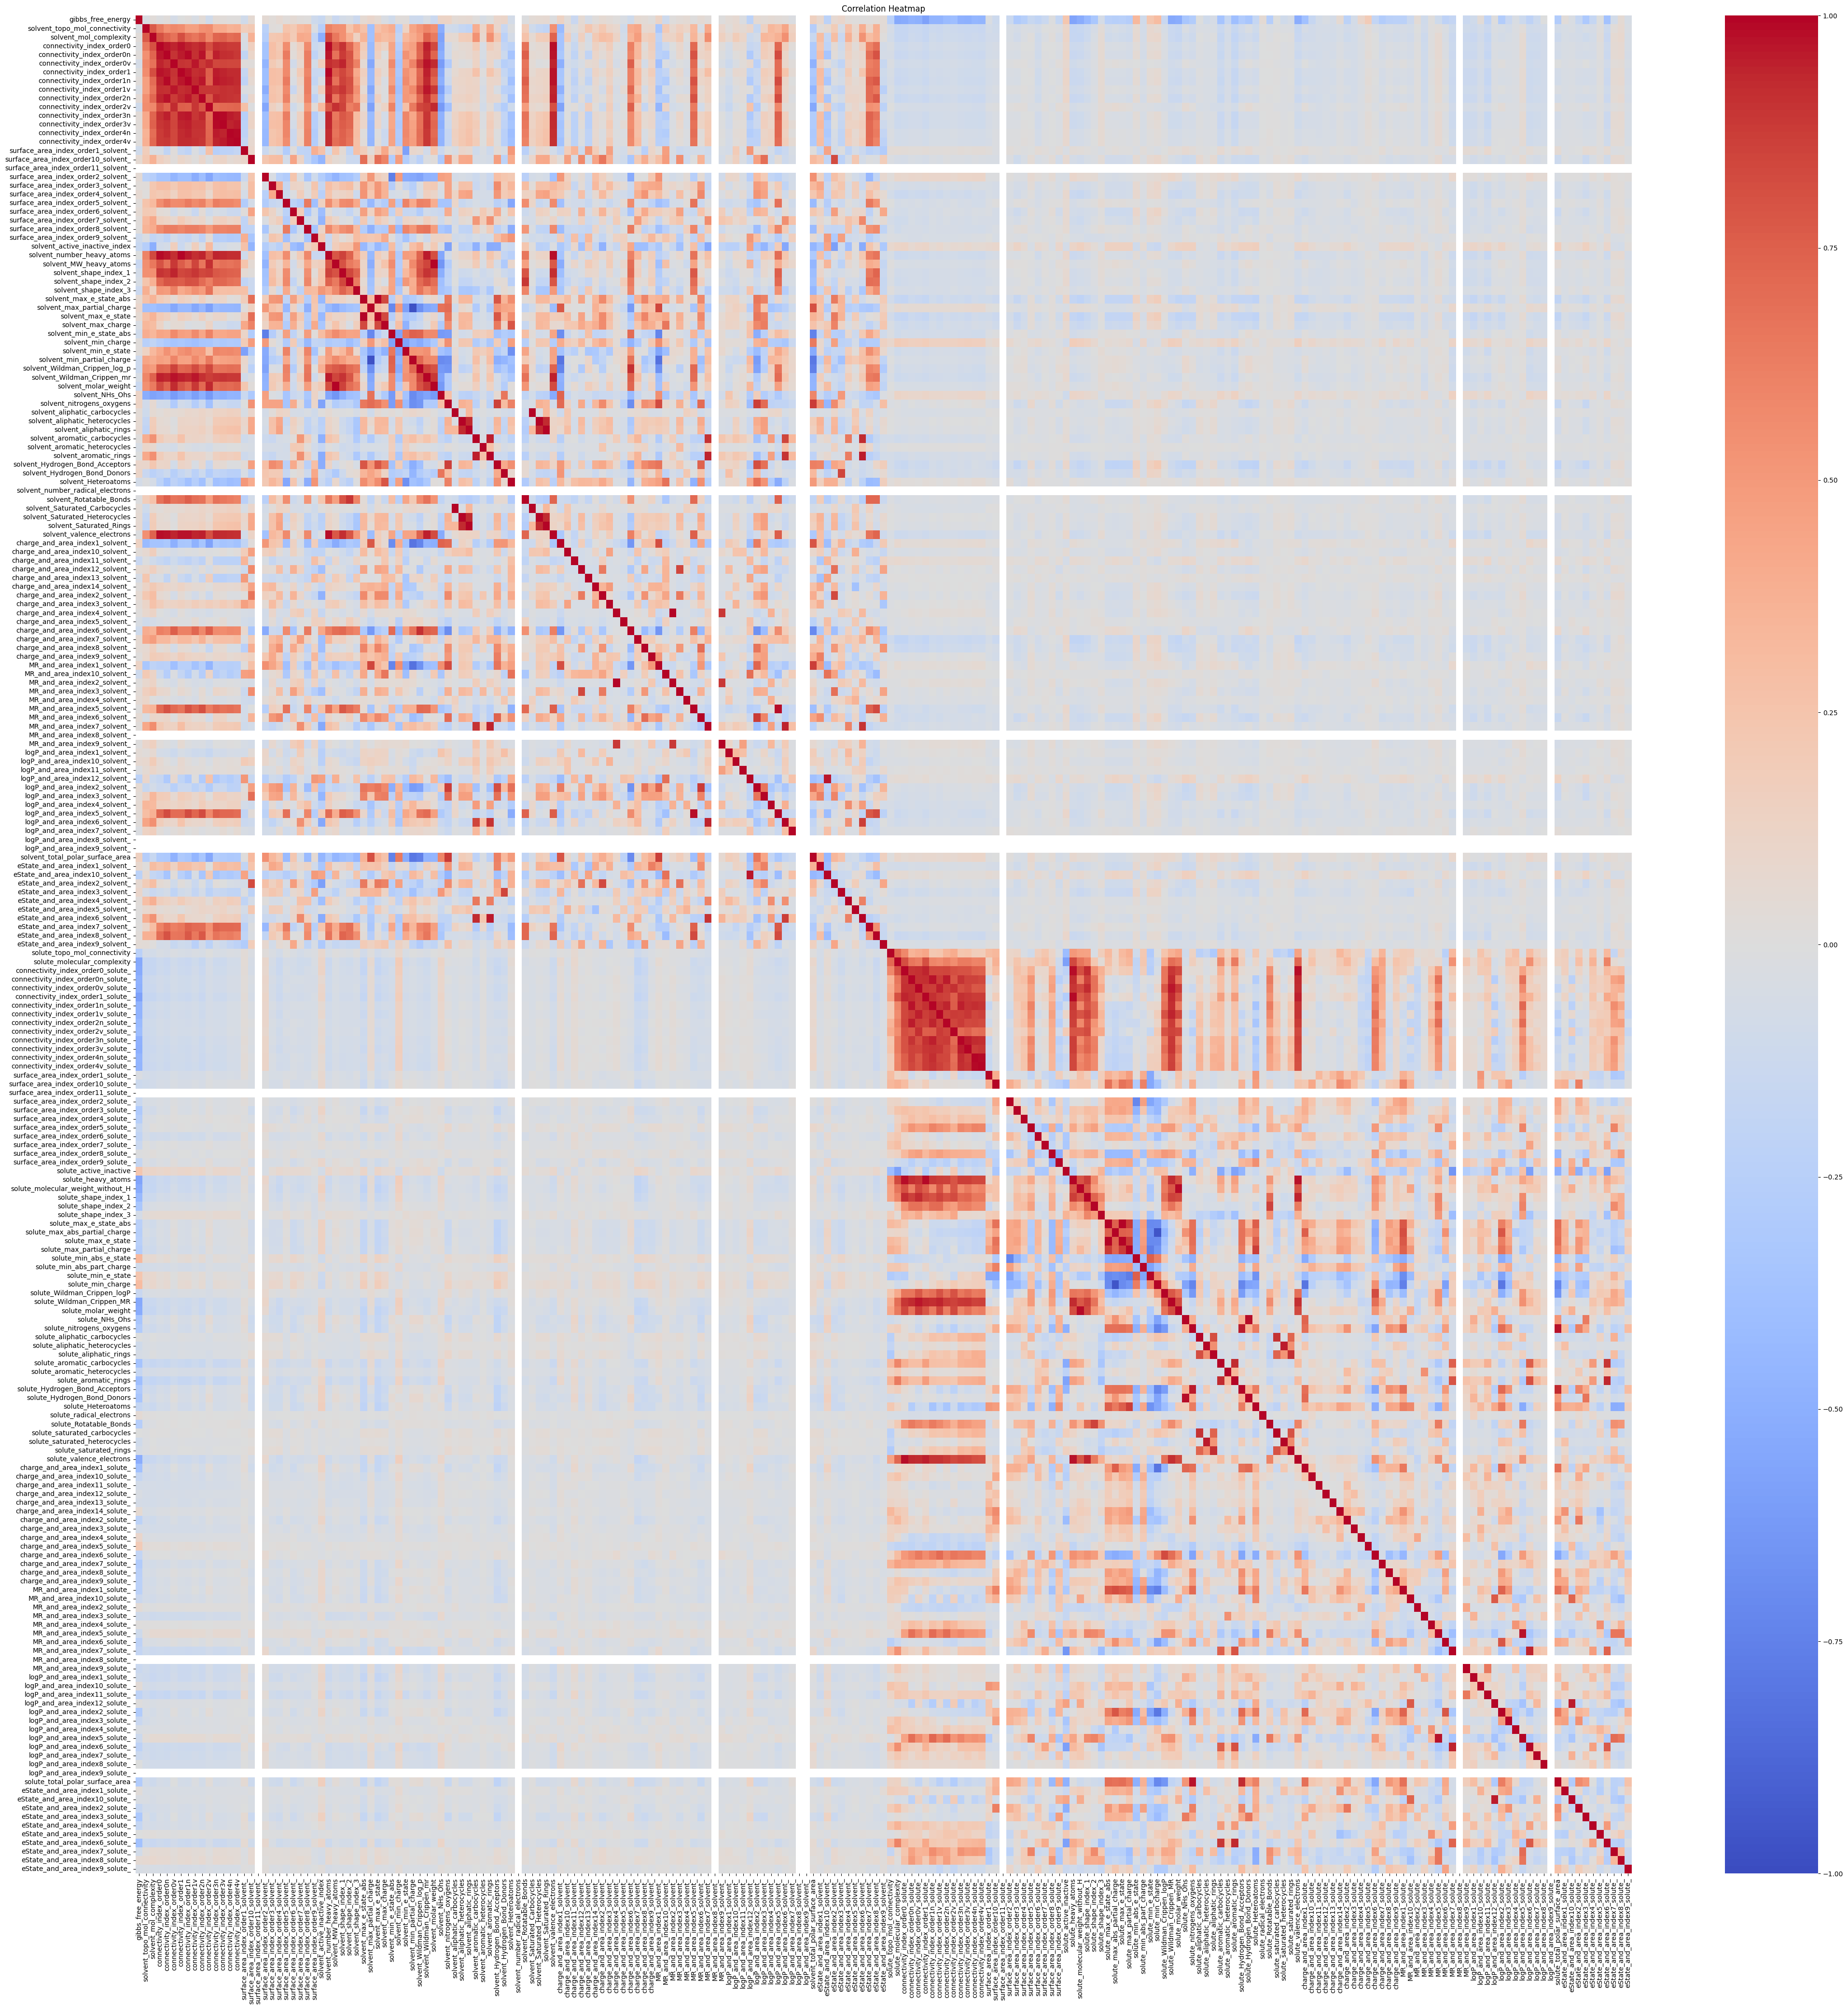

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make a correlation matrix to quickly see how column are related
# use spearman rank correlation (non parametric)
corr_matrix = df.fillna(0)[df.columns[1:]].corr(method='spearman')

# Visualize the corr matrix as a heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, vmax=1, vmin=-1)
plt.title("Correlation Heatmap")
plt.show()

In [17]:
# Why are there blank lines in the corr matrix?
# It's because some columns contain ONLY ZEROES!!!
# For example look at the column below
df.solvent_number_radical_electrons.describe()

count    6239.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: solvent_number_radical_electrons, dtype: float64

In [18]:
df['solvent_number_radical_electrons'].describe()

count    6239.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: solvent_number_radical_electrons, dtype: float64

In [19]:
# Another all zero column
df['logP_and_area_index9_solute_'].describe()

count    6239.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: logP_and_area_index9_solute_, dtype: float64

# - Fill missing values with 0
# - Drop any duplicate rows
# - Removing columns that had 0 in all observations
# - Checking outliers

In [4]:
# replace all the nan with 0
df_fillna = df.fillna(0)
df_fillna.drop_duplicates(inplace=True) #dropping ROWS

In [21]:
df_fillna.isna().sum().sum()

np.int64(0)

In [22]:
df_fillna.shape

(6238, 214)

In [23]:
col_w_all_zeros = []
for col in df_fillna.columns[1:]:
    if ((df_fillna[col])**2).sum() == 0:
        df_fillna.drop(col, axis =1, inplace=True)
        col_w_all_zeros.append(col)
    else:
        pass
print(f'Removed {len(col_w_all_zeros)} columns with all zeros.')

Removed 8 columns with all zeros.


In [24]:
# eyeballing some of the columns I can see that some are skewed, mean != median
# for ex. if mean > median then the distribution is right skewed
# and there are outliers greater than 3 std away from mean, look at solvent_mol_complexity for ex
df_fillna.describe()

,gibbs_free_energy,solvent_topo_mol_connectivity,solvent_mol_complexity,connectivity_index_order0,connectivity_index_order0n,connectivity_index_order0v,connectivity_index_order1,connectivity_index_order1n,connectivity_index_order1v,connectivity_index_order2n,...,eState_and_area_index1_solute_,eState_and_area_index10_solute_,eState_and_area_index2_solute_,eState_and_area_index3_solute_,eState_and_area_index4_solute_,eState_and_area_index5_solute_,eState_and_area_index6_solute_,eState_and_area_index7_solute_,eState_and_area_index8_solute_,eState_and_area_index9_solute_
count,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,...,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000
mean,-3.831407,2.349395,50.712386,5.112911,4.453125,4.752397,3.106873,2.493866,2.691991,1.603970,...,2.352565,1.383652,2.125574,1.781543,0.326270,0.141656,1.453376,1.942471,2.938981,0.080912
std,2.278725,0.908214,52.074926,2.960398,2.926040,2.827085,2.019476,1.998428,1.962207,1.360250,...,8.166722,4.231572,4.507584,3.719038,1.161216,0.742350,3.455220,3.291583,2.727144,1.106910
min,-25.470000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,...,-3.699074,-0.750000,-3.555556,-9.316358,-4.527778,-23.875000,-0.425926,-16.434028,-3.743519,-10.472222
25%,-4.952350,2.190610,11.119415,3.577350,2.308641,3.333965,1.914214,1.034522,1.523335,0.447214,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.925674,2.595083,29.193808,4.991564,3.976782,4.386751,2.914214,2.100685,2.379177,1.410684,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,2.360278,0.000000
75%,-2.728578,2.847379,88.935697,5.983128,5.437817,5.535534,3.804530,3.070004,3.414214,2.154701,...,0.000000,0.000000,0.000000,0.194444,0.000000,0.000000,0.000000,2.935926,4.491389,0.000000
max,3.430000,3.998983,341.098159,13.313709,12.118275,12.338595,8.914214,7.914214,8.178236,5.242641,...,92.875000,60.858419,35.906250,52.176914,13.356975,8.000000,21.857963,38.391426,12.586806,8.222222


In [25]:
df_fillna.select_dtypes(exclude='number').columns

Index(['Solvent_Type'], dtype='object')

In [26]:
counter = 0 
for col in df_fillna.columns[1:]:
    mean = df_fillna[col].mean()
    std = df_fillna[col].std()
    absol = df_fillna[col]
#print(absol)
    if (abs(df_fillna[col] - mean) > (3*std)).sum() > 0:
        #print(col)
        counter += 1
    else:
        pass
print(f'Total number of columns with outliers = {counter}')

Total number of columns with outliers = 171


In [27]:
# let's see how many columns have outliers, we'll define that as greater than 3 standard deviations
# exclude the first column, bc that's the categorical column solvent_type

col_w_outliers = []

for col in df_fillna.columns[1:]:
    mean = df_fillna[col].mean()
    std = df_fillna[col].std()
    if (abs(df_fillna[col] - mean) > (3 * std)).sum() > 0:
        col_w_outliers.append(col)

In [28]:
col_w_outliers
len(col_w_outliers)

171

# - Dummy Encode the Solvent Type
# - Define X and y 

In [29]:
# Now let's take a look at the one categorical column - it will need to be encoded in some way
# It's ok to do the encoding before the split for this since encoding does NOT change the values depending on each other
df_fillna['Solvent_Type'].value_counts()

Solvent_Type
Organic oxygen compounds           1460
Hydrocarbons                       1127
Organic acids and derivatives       804
Benzenoids & Organo-N-S comp        775
Water                               642
Organohalogen compounds             631
Organoheterocyclic compounds        575
Lipids and lipid-like molecules     224
Name: count, dtype: int64

In [30]:
# this is a nominal variable (ie NOT ordered, NOT ordinal), so I'll encode it as dummy variables
X_dummy_encode = pd.get_dummies(df_fillna, columns=['Solvent_Type'])

In [31]:
X_dummy_encode.filter(like='Solvent_Type').columns

Index(['Solvent_Type_Benzenoids & Organo-N-S comp',
       'Solvent_Type_Hydrocarbons',
       'Solvent_Type_Lipids and lipid-like molecules',
       'Solvent_Type_Organic acids and derivatives',
       'Solvent_Type_Organic oxygen compounds',
       'Solvent_Type_Organohalogen compounds',
       'Solvent_Type_Organoheterocyclic compounds', 'Solvent_Type_Water'],
      dtype='object')

In [32]:
# Let's rename some of the dummy encoded variables so they are easier to read/handle
X_dummy_encode.rename(columns={
  'Solvent_Type_Benzenoids & Organo-N-S comp': 'Solvent_Type_Benzenoids_and_Organo-N-S_comp',
    'Solvent_Type_Lipids and lipid-like molecules': 'Solvent_Type_Lipids_and_lipid-like_molecules',
    'Solvent_Type_Organic acids and derivatives': 'Solvent_Type_Organic_acids_and_derivatives',
    'Solvent_Type_Organic oxygen compounds': 'Solvent_Type_Organic_oxygen_compounds',
    'Solvent_Type_Organohalogen compounds': 'Solvent_Type_Organohalogen_compounds',
    'Solvent_Type_Organoheterocyclic compounds': 'Solvent_Type_Organoheterocyclic_compounds'
}, inplace=True)

In [33]:
X_dummy_encode.columns

Index(['gibbs_free_energy', 'solvent_topo_mol_connectivity',
       'solvent_mol_complexity', 'connectivity_index_order0',
       'connectivity_index_order0n', 'connectivity_index_order0v',
       'connectivity_index_order1', 'connectivity_index_order1n',
       'connectivity_index_order1v', 'connectivity_index_order2n',
       ...
       'eState_and_area_index8_solute_', 'eState_and_area_index9_solute_',
       'Solvent_Type_Benzenoids_and_Organo-N-S_comp',
       'Solvent_Type_Hydrocarbons',
       'Solvent_Type_Lipids_and_lipid-like_molecules',
       'Solvent_Type_Organic_acids_and_derivatives',
       'Solvent_Type_Organic_oxygen_compounds',
       'Solvent_Type_Organohalogen_compounds',
       'Solvent_Type_Organoheterocyclic_compounds', 'Solvent_Type_Water'],
      dtype='object', length=213)

In [34]:
# Now let's make lists of the numeric and categorical dummy encoded variables so it's easier to do the
# data preprocessing below

dummy_col = X_dummy_encode.filter(like='Solvent_Type').columns.tolist() #all of the column that start with Solvent_Type put into a list

dummy_col_set = set(dummy_col) #no duplicates in a set

all_col_set = set(X_dummy_encode.columns)

numeric_col = list(all_col_set - dummy_col_set) #all columns minus the 1hot endoded columns 

In [35]:
len(dummy_col)

8

In [36]:
len(numeric_col)

205

In [37]:
# great, the columns add up
X_dummy_encode.shape

(6238, 213)

In [38]:
#saving clean data for further - no need to run again
X_dummy_encode.to_csv('clean_gibbs_data.csv',index=False)

In [5]:
#In future, to run directly from here
import pandas as pd
clean_data = pd.read_csv('clean_gibbs_data.csv')

In [6]:
# Now separate data into X and y
X = clean_data.drop(columns=['gibbs_free_energy'])
y = clean_data.gibbs_free_energy

In [7]:
X.shape

(6238, 212)

In [8]:
y.shape

(6238,)

# - Question 2:
Based on the problem statement and the nature of the output you are predicting with your machine learning model, justify whether regression or classification is the more appropriate choice. Implement the chosen approach using linear models, Support Vector Machines (SVMs), and Random Forests (RFs). **(20 points)**

Adhere to the following specifications for model development:

(a) Data Splitting:  Initially, divide your data into training and testing sets using an 80/20 split. Subsequently, split the testing set into validation and final test sets, each comprising 50% of the original testing data.

(b) Model Parameters: For the SVM model, utilize the radial basis function (rbf) kernel with a regularization parameter (C) of 10. For the RF model, configure the following hyperparameters: 250 trees, a minimum of 2 samples required to split an internal node, a minimum of 1 sample required to be at a leaf node, the square root of the total number of features as the maximum number of features considered for splitting a node, and disable bootstrapping.

#### Justification:
- Since we are predicting a continuous variable, we will use regression.

#### Spilitting X_dummy_encode (contain 1hot encoding for the non-numerical column) into train and test 

In [9]:
# do the train test split so that we can preprocess the data
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Scaling the train data so feature with larger ranges do not dominate predictions
- then applying the training scaled values to the test set so we can compare them properly

In [10]:
# select all the numeric columns, ie select all the columns that are NOT the dummy encoded solvent type columns
numeric_col = clean_data.columns[1:-8].tolist()

In [11]:
# import robustscaler to do the preprocessing SEPARATELY for the trains and tests
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_scaled = X_train.copy()
X_train_scaled[numeric_col] = scaler.fit_transform(X_train_scaled[numeric_col]) #scaling the training set to have a mean=0 and std=1
# NOTE! Do NOT fit the scaler to the test dataset since it is
# holdout only transform it using the scaler already fit to the train
# see section 10.2.1 https://scikit-learn.org/stable/common_pitfalls.html
X_test_scaled = X_test.copy()
X_test_scaled[numeric_col] = scaler.transform(X_test_scaled[numeric_col]) #using the same transformation done on the training,
#and applying it to the test. you need to do this otherwise you cant compare the train/test sets if one is scaled and the
#other isn't. KEY THING is that you are not FITTING the scaler on the test, just using the parameters from the fit_transform on
#the train set, and using the SAME paramenters to transform the test. 

- plotting check:

array([[<Axes: title={'center': 'solvent_topo_mol_connectivity'}>,
        <Axes: title={'center': 'solvent_mol_complexity'}>],
       [<Axes: title={'center': 'connectivity_index_order0'}>,
        <Axes: title={'center': 'connectivity_index_order0n'}>]],
      dtype=object)

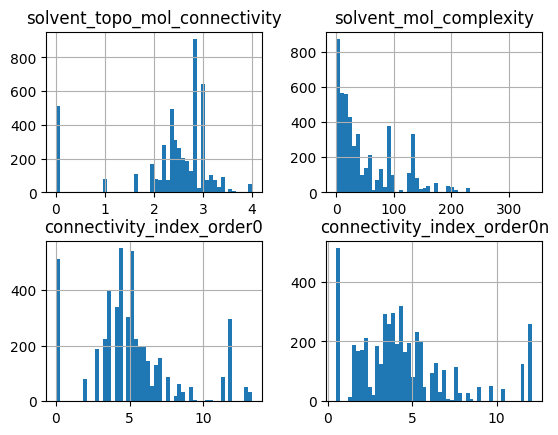

In [10]:
X_train[X_train.columns[:4]].hist(bins=50)

array([[<Axes: title={'center': 'solvent_topo_mol_connectivity'}>,
        <Axes: title={'center': 'solvent_mol_complexity'}>],
       [<Axes: title={'center': 'connectivity_index_order0'}>,
        <Axes: title={'center': 'connectivity_index_order0n'}>]],
      dtype=object)

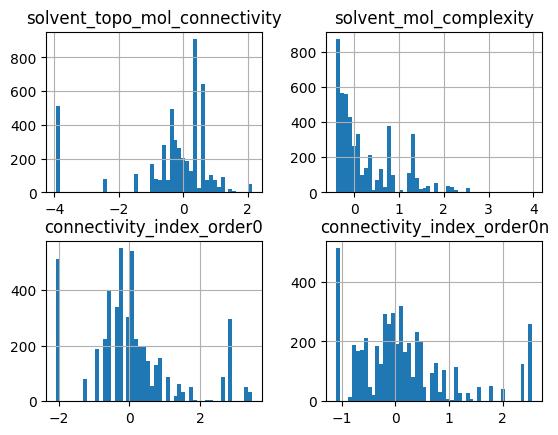

In [11]:
X_train_scaled[X_train_scaled.columns[:4]].hist(bins=50)

In [12]:
#split the testing set into validation and final test sets, each comprising 50% of the original testing data
X_val, X_final_test, y_val, y_final_test = train_test_split(X_test_scaled, y_test, test_size=0.50, random_state=42)

#### Linear regression model

In [13]:
from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score


In [14]:
lin_reg_model = linear_model.LinearRegression() #create the lin_reg_model object

lin_reg_model.fit(X_train_scaled, y_train) #train on the scaled train set and the predicted y set

LinearRegression()

In [15]:
#predictions of the validation set
y_pred_linreg = lin_reg_model.predict(X_val)

# model evaluation
print("Mean squared error of the model on the validation set : {MSE}" .format(MSE= mean_squared_error(y_val, y_pred_linreg)))
print("Coefficient of determination (R-squared) on the validation set:{r2}".format (r2=r2_score(y_val, y_pred_linreg)))

MSE= mean_squared_error(y_val, y_pred_linreg)
r2=r2_score(y_val, y_pred_linreg)

Mean squared error of the model on the validation set : 1.1227531212107285
Coefficient of determination (R-squared) on the validation set:0.7660214852494021


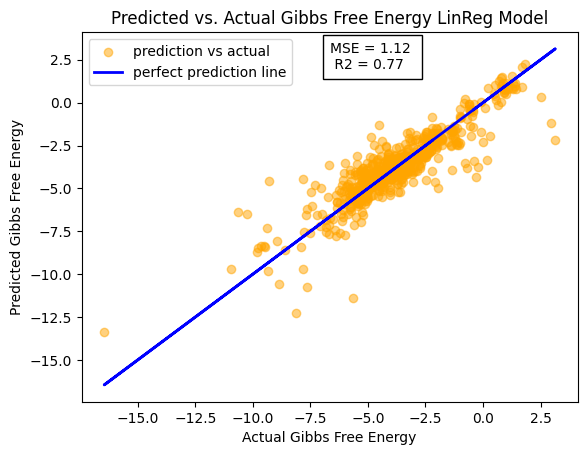

In [16]:
import matplotlib.pyplot as plt
plt.scatter(y_val, y_pred_linreg, color='orange', alpha=0.5, label='prediction vs actual')  # Scatter plot of actual vs. predicted
plt.plot(y_val, y_val, color='blue', linewidth=2, label='perfect prediction line')  # Identity line (perfect prediction)

plt.xlabel('Actual Gibbs Free Energy')
plt.ylabel('Predicted Gibbs Free Energy')
plt.title('Predicted vs. Actual Gibbs Free Energy LinReg Model')
plt.text(0.5, 0.9, f'MSE = {MSE:.2f} \n R2 = {r2:.2f}' ,

         transform=plt.gca().transAxes,

        bbox={'facecolor': 'white', 'edgecolor': 'black', 'pad': 5})
plt.legend()
plt.show()

#### Support Vector Machine

In [15]:
from sklearn.svm import SVR

In [16]:
#For the SVM model, utilize the radial basis function (rbf) kernel with a regularization parameter (C) of 10

reg_svm = SVR(kernel='rbf', C=10) #create reg_svm class. 

reg_svm.fit(X_train_scaled, y_train) #train on the scaled train set and the predicted y set

SVR(C=10)

In [19]:
y_pred_svm = reg_svm.predict(X_val)

# model evaluation
print("Accuracy on training set: {:.3f}".format(reg_svm.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(reg_svm.score(X_val, y_val)))

Accuracy on training set: 0.600
Accuracy on test set: 0.549


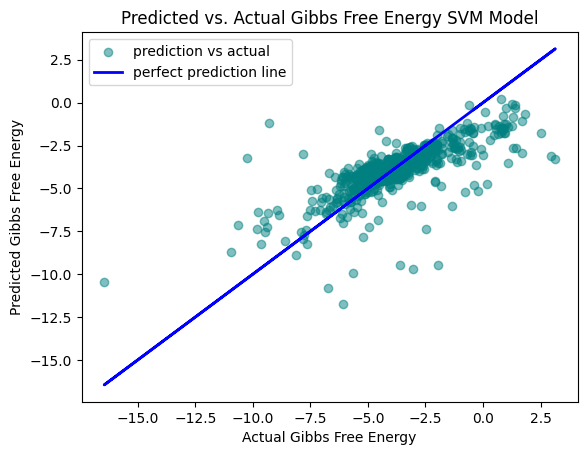

In [20]:
plt.scatter(y_val, y_pred_svm, color='teal', alpha=0.5, label='prediction vs actual')  # Scatter plot of actual vs. predicted
plt.plot(y_val, y_val, color='blue', linewidth=2, label='perfect prediction line')  # Identity line (perfect prediction)

plt.xlabel('Actual Gibbs Free Energy')
plt.ylabel('Predicted Gibbs Free Energy')
plt.title('Predicted vs. Actual Gibbs Free Energy SVM Model')
plt.legend()
plt.show()

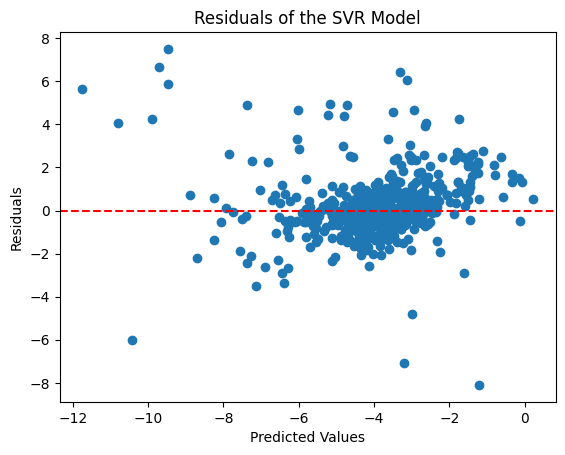

In [21]:
# Calculate residuals
residuals = y_val - y_pred_svm

# Plot residuals
plt.scatter(y_pred_svm, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals of the SVR Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#### Random Forest
-  For the RF model, configure the following hyperparameters: 250 trees, a minimum of 2 samples required to split an internal node, a minimum of 1 sample required to be at a leaf node, the square root of the total number of features as the maximum number of features considered for splitting a node, and disable bootstrapping.

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
rf_model = RandomForestRegressor(
    n_estimators=250,      # 250 trees
    min_samples_split=2,   # Minimum 2 samples required to split a node
    min_samples_leaf=1,    # Minimum 1 sample required at a leaf node
    max_features='sqrt',   # Square root of the total number of features
    bootstrap=False,       # Disable bootstrapping
    random_state=42        # For reproducibility
)

rf_model.fit(X_train_scaled, y_train)  # Train the model

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=250,
                      random_state=42)

In [24]:
y_pred_rf = rf_model.predict(X_val)    # Predict on validation set

In [27]:
# model evaluation
print("Mean squared error of the model on the validation set : {MSE}" .format(MSE=mean_squared_error(y_val, y_pred_rf)))
print("Coefficient of determination (R-squared) on the validation set:{r2}".format (r2=r2_score(y_val, y_pred_rf)))

Mean squared error of the model on the validation set : 0.2697984460173956
Coefficient of determination (R-squared) on the validation set:0.9437747813935301


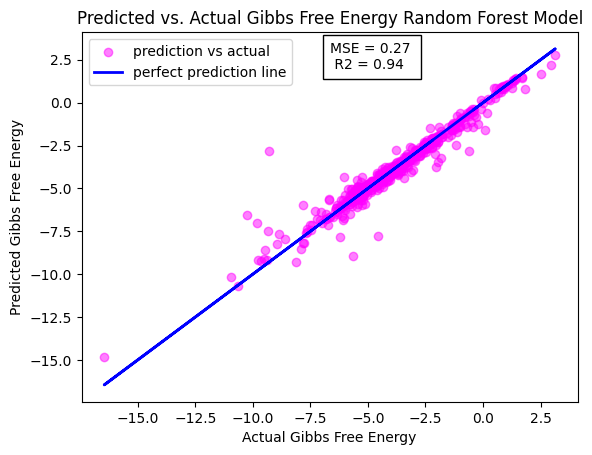

In [28]:
plt.scatter(y_val, y_pred_rf, color='magenta', alpha=0.5, label='prediction vs actual')  
plt.plot(y_val, y_val, color='blue', linewidth=2, label='perfect prediction line')

plt.xlabel('Actual Gibbs Free Energy')
plt.ylabel('Predicted Gibbs Free Energy')
plt.title('Predicted vs. Actual Gibbs Free Energy Random Forest Model')
plt.text(0.5, 0.9, f'MSE = {MSE:.2f} \n R2 = {r2:.2f}' ,

         transform=plt.gca().transAxes,

        bbox={'facecolor': 'white', 'edgecolor': 'black', 'pad': 5})
plt.legend()
plt.show()

# **Question 3** Model Evaluation. Your code should output a .csv file that has the following columns:

```algorithm```

```test_score```

```mean absolute error```

 ```standard deviaiton of mean absolute errors```
(calculated using 10-fold cross on the validation dataset.)


You will have the three performance metrics for each of your three algorithms in your ```output.csv``` file. Also plot these three metrics for your algorithms in one bar plot. **(20 points)**

In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
import numpy as np

# make a dict with the algorithm name and the fitted models above
alg_model_dict = {
    'linear_regression': lin_reg_model,
    'support_vector_machine': reg_svm,
    'random_forest': rf_model
}

# define a function so that we can use the following work again in Q4 below
def get_model_scores(alg_model_dict, model_sig_features_dict=None):
    # initialize KFold to split X_val and y_val into 10 folds
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    
    # append the results of each model to a results list that we can later turn into a df
    results = []
    
    # iterate through our models that we saved to the dictionary above
    for model_name, model in alg_model_dict.items():

        try:
            # see if user provided sig features dict, ie specific columns to use for train
            columns_to_use = model_sig_features_dict[model_name]
        except (TypeError, KeyError):
            # TypeError: model_sig_features_dict is None
            # KeyError: model_name not found in the dictionary
            columns_to_use = X_final_test.columns.tolist()  # Use all columns
            pass  # pass if one of these errors is thrown
        
        # Test score on the final test holdout
        test_score = model.score(X_final_test[columns_to_use], y_final_test)
    
        # MAE on the final test holdout
        y_pred_final_test = model.predict(X_final_test[columns_to_use])
        mae = mean_absolute_error(y_final_test, y_pred_final_test)
    
        # Calculate std of MAE on 10 different folds of X_val
        fold_mae_scores = []
        val_index_length = 0
        # make another for loop that iterates through each fold of the 10folds
        # don't need to use the train_index since we've already trained our models previously
        for train_index, val_index in kf.split(X_val[columns_to_use]):
            # Validation data only (no retraining)
            # usually you train on k-1 folds, and then test on the remaining fold
            # since we have already trained our models we'll just train on the 10 remaining folds
            # so we only need to locate the X_val and y_val rows from val_index
            X_val_fold, y_val_fold = X_val[columns_to_use].iloc[val_index], y_val.iloc[val_index]
        
            # Predict using the ALREADY trained model
            y_pred_val = model.predict(X_val_fold)
        
            # Calculate MAE for the fold
            fold_mae = mean_absolute_error(y_val_fold, y_pred_val)
            fold_mae_scores.append(fold_mae)
    
            # Make sure we're using KFold correctly... count up the total number of indices across all folds
            val_index_length += len(val_index)
        
        # calculate the std of the 10 MAE scores
        std_mae = np.std(fold_mae_scores)
    
        # append results
        results.append([model_name, test_score, mae, std_mae])
    
    # turn the nested results list into a pandas df so it is easier to plot into a bar graph below
    results_df = pd.DataFrame(results, columns=['algorithm', 'test_score', 'mae', 'std_mae'])

    # return the results_df
    return results_df

In [20]:
results_df = get_model_scores(alg_model_dict)

In [21]:
results_df

,algorithm,test_score,mae,std_mae
0,linear_regression,0.837182,0.619328,0.095364
1,support_vector_machine,0.580802,0.924904,0.126619
2,random_forest,0.950008,0.256322,0.086377


In [20]:
import matplotlib.pyplot as plt

def get_model_scores_vis(results_df):
    # set the algorithm column as index so algorithm is groups on x axis
    results_df.set_index('algorithm', inplace=True)
    
    # Make bar plots
    results_df.plot(kind='bar', figsize=(10, 6))
    
    # Add labels and title
    plt.xlabel('Algorithm')
    plt.xticks(rotation=0)
    plt.ylabel('Scores')
    plt.title('Algorithm Comparison: Test Score, MAE, and STD of MAE')
    plt.legend(title='Metric')
    # add grid so it's easier to see height differences in bars
    plt.grid(True)
    plt.tight_layout()
    plt.show()

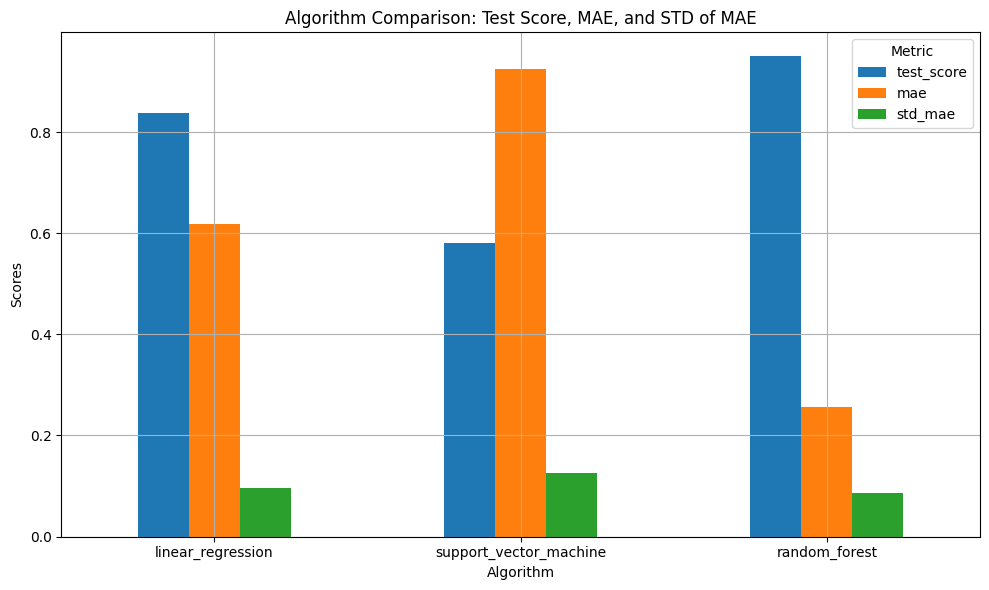

In [23]:
get_model_scores_vis(results_df)

**Question 4** Calculate the feature importance for all three models. Note that for non-linear models, simply using coefficients does not provide an accurate estimate of feature importance.  Permutation feature importance is generally recommended in such cases. For consistency, use permutation feature importance for all three models.

1. Remove any negative and zero importance features and see what happens to MAE and the standard deviation of MAE in the cross_val scores. **(10 points)**

2. Make a bar plot of the top 10 features. Use only the top features and see what happens to MAE and the standard deviation of MAE in the cross_val scores.**(10 points)**

scikitlearn doc on permutation_importance: https://scikit-learn.org/stable/modules/permutation_importance.html

### SKIP TO BELOW! I've already run this cell and saved the output for you (it takes a long time to run)

In [55]:
# make an empty dictionary to store permutation importance results for each model
perm_importance_dict = {}

# iterate through the model dictionary defined in Q3 above
for model_name, model in alg_model_dict.items():
    # run the permutation importance for each model
    r = permutation_importance(
        model, 
        X_final_test, 
        y_final_test,
        n_repeats=30,
        random_state=42
    )
    # store the permutation importance results as nested dictionaries in the perm_importance_dict, where the
    # keys to each nested dict is the model_name
    perm_importance_dict[model_name] = {
        'importances_mean': r.importances_mean.tolist(),  # Convert NumPy arrays to lists
        'importances_std': r.importances_std.tolist(),
        'importances': r.importances.tolist()
    }

In [59]:
import json
# save the perm_importance_dict to a JSON file so we don't have to run the cell above again (takes a long time)
with open('perm_importance_dict.json', 'w') as f:
    json.dump(perm_importance_dict, f, indent=4)

### Start here to run Q4!

In [21]:
import json
# load the saved JSON file of the perm_importance_dict
with open('perm_importance_dict.json', 'r') as f:
    perm_importance_dict = json.load(f)

Part 1:

In [22]:
# instantiate new untrained models and make a new model_name, model dict
lin_model_sig_features = linear_model.LinearRegression()

reg_svm_sig_features = SVR(kernel='rbf', C=10)

rf_regressor_sig_features = RandomForestRegressor(
    n_estimators=250,      # 250 trees
    min_samples_split=2,   # Minimum 2 samples required to split a node
    min_samples_leaf=1,    # Minimum 1 sample required at a leaf node
    max_features='sqrt',   # Square root of the total number of features
    bootstrap=False,       # Disable bootstrapping
    random_state=42        # For reproducibility
)

alg_model_dict_sig_features = {
    'linear_regression': lin_model_sig_features,
    'support_vector_machine': reg_svm_sig_features,
    'random_forest': rf_regressor_sig_features
}

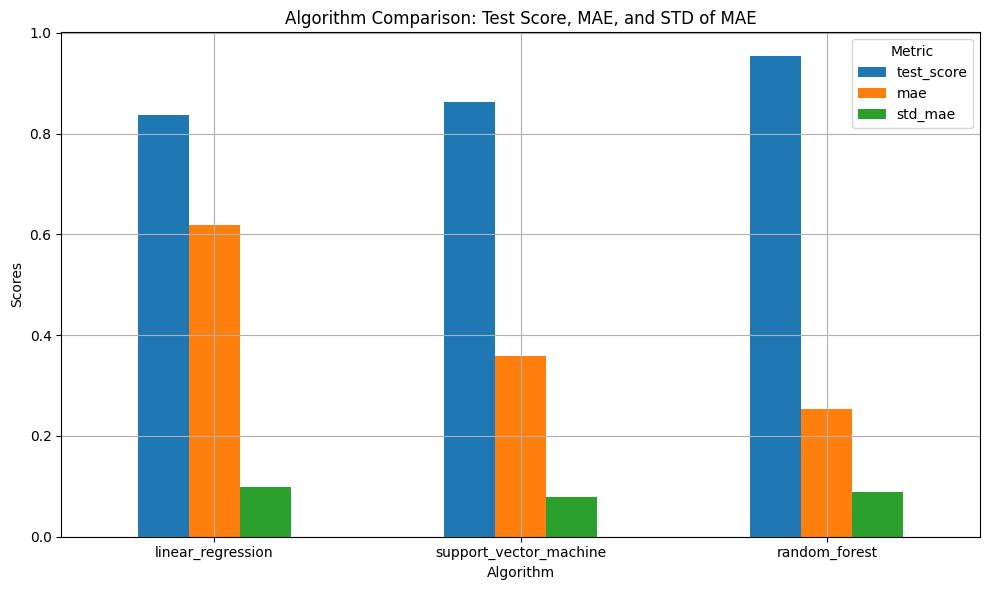

In [23]:
model_sig_features_dict = {}

for model_name, model in alg_model_dict_sig_features.items():
    # idenfity the negative or zero importance features to drop from training
    significant_features = []

    # sort the importances mean then identify those where the mean+/-std interval DOES NOT contain zero or negative values
    # note this is like a 95% CI since 2 std away from the mean is 95% of the data, and if this interval contains 0
    # then we know the result isn't significant
    for i in np.array(perm_importance_dict[model_name]['importances_mean']).argsort()[::-1]:
        if perm_importance_dict[model_name]['importances_mean'][i] - 2 * perm_importance_dict[model_name]['importances_std'][i] > 0:
            # find the column names where the importance is NOT negative or 0
            # note, could use any of the X df here, they should all have the same columns with the same indices
            # I decided to use X_final_test since that's what I used for the permutation_importance function above
            significant_features.append(X_final_test.columns[i])
    
    # fit the model to X_train_scaled EXCLUDING negative or zero importance features, ie only on significant columns
    model.fit(X_train_scaled[significant_features], y_train)

    # save the significant_features for the model to the dictionary above
    model_sig_features_dict[model_name] = significant_features
    

# call the get_model_scores function we defined above in Q3 to see how this new training affects model scores
results_df_dropped_neg_zero_features = get_model_scores(alg_model_dict_sig_features, model_sig_features_dict)

# plot the results using the plotting function we defined above in Q3
get_model_scores_vis(results_df_dropped_neg_zero_features)

Part 2:

In [ ]:
# instantiate new untrained models and make a new model_name, model dict
lin_model_top_10_features = linear_model.LinearRegression()

reg_svm_top_10_features = SVR(kernel='rbf', C=10)

rf_regressor_top_10_features = RandomForestRegressor(
    n_estimators=250,      # 250 trees
    min_samples_split=2,   # Minimum 2 samples required to split a node
    min_samples_leaf=1,    # Minimum 1 sample required at a leaf node
    max_features='sqrt',   # Square root of the total number of features
    bootstrap=False,       # Disable bootstrapping
    random_state=42        # For reproducibility
)

alg_model_dict_top_10_features = {
    'linear_regression': lin_model_top_10_features,
    'support_vector_machine': reg_svm_top_10_features,
    'random_forest': rf_regressor_top_10_features
}

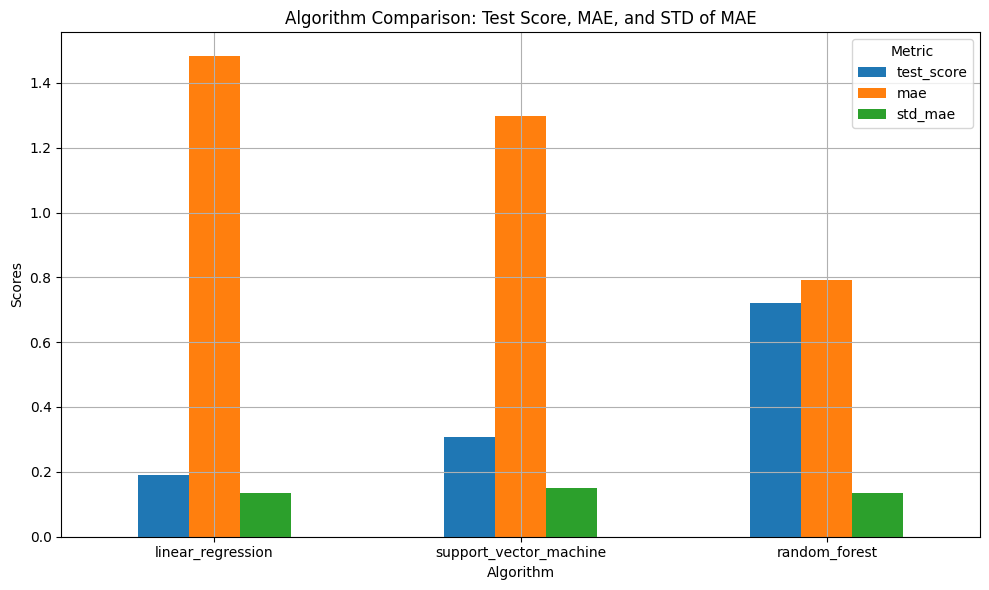

In [30]:
# top 10 features
model_top_10_features_dict = {}

# similar to above cell, but instead of only discarding 0 or negative importance features we are
# including ONLY the top 10 features in training
for model_name, model in alg_model_dict_top_10_features.items():
    # identify top 10 most important features
    # sort the importances means (argsort), then flip so it is in descending order, then save the top 10
    top_10_features_indices = np.array(perm_importance_dict[model_name]['importances_mean']).argsort()[::-1][:10]
    # find the names of the columns for the indices returned from argsort()
    top_10_features = [X_final_test.columns[i] for i in top_10_features_indices]
    
    # fit the model ONLY to the top_10_features
    model.fit(X_train_scaled[top_10_features], y_train)

    # save the significant_features for the model to the dictionary above
    model_top_10_features_dict[model_name] = top_10_features

# call the get_model_scores function we defined above in Q3 to see how this new training affects model scores
results_df_top_10_features = get_model_scores(alg_model_dict_top_10_features, model_top_10_features_dict)

# plot the results using the plotting function we defined above in Q3
get_model_scores_vis(results_df_top_10_features)

### SKIP! Or delete - was messing around to make sure I understood how to use permutation_importance function

In [34]:
from sklearn.inspection import permutation_importance
r = permutation_importance(rf_model, X_final_test, y_final_test,
                           n_repeats=30,
                           random_state=42)

# calculating permutation feature importance for each model
# use the 

In [69]:
perm_importance_dict['linear_regression']

{'importances_mean': [0.3973008307940532,
  0.005355893077786559,
  30586819679.96071,
  1779571482.8629405,
  18306248897.835888,
  17.103092399774127,
  17077440480.451582,
  16554609277.996527,
  24176918.326035496,
  28110316.04326013,
  2868160.0379774645,
  3399795.2956608846,
  94122875.00744122,
  118646582.48033482,
  19553346919402.77,
  18974533267091.95,
  36602845717817.49,
  184876102291492.5,
  279244289245119.16,
  2059354536787605.2,
  89512803033418.61,
  257688282861268.28,
  375042550426505.6,
  627130808570340.5,
  66726366.3830364,
  8861317748.47744,
  4730016428753.22,
  2290.4271399166155,
  0.14667460182632397,
  0.0007484686994948124,
  40891377.38781113,
  999890279.0175412,
  40887966.511676386,
  29.180810316094583,
  0.04058986659741026,
  1.3646571563759307,
  0.3099833144410928,
  1113957526.707173,
  2589.7570357350196,
  23121.82874015693,
  5597845226632.27,
  1202432675.8039076,
  15236751969.296425,
  309226.2712952851,
  50044699.84235935,
  55656

In [68]:
r

{'importances_mean': array([ 1.64256037e-03,  1.58766220e-03,  1.49363415e-03,  2.23626844e-03,
         3.30562594e-03,  1.69069821e-03,  1.69669212e-03,  2.76806636e-03,
         8.91432057e-04,  1.12796720e-03,  1.45426869e-04,  1.53454044e-04,
         1.66452768e-04,  1.15776397e-04,  3.04197653e-04,  6.01897285e-05,
         4.24678333e-04,  8.27204399e-05,  4.63172814e-05,  7.73533704e-05,
         4.35249166e-05,  6.58294256e-05,  4.22702910e-04,  1.26858209e-03,
         7.65282025e-04,  1.78172035e-03,  1.65970307e-03,  2.55304497e-03,
         1.56786949e-03,  1.07545323e-03,  2.35832940e-03,  1.03429756e-03,
         2.19315763e-03,  2.21985497e-03,  2.08640188e-03,  1.30524433e-03,
         4.29191384e-04,  1.02618017e-03,  5.11822152e-03,  2.00168503e-03,
         1.70097087e-03,  4.16720417e-03,  6.68407408e-04,  1.24438583e-06,
         4.18392049e-05,  3.40703284e-05,  2.16802045e-05,  1.94526427e-07,
         2.80681542e-05,  2.90933915e-04,  1.94564351e-04,  3.127331

In [50]:
X_final_test.shape

(624, 212)

In [46]:
len(r.importances[0])

30

In [47]:
r.importances_mean.shape

(212,)

In [42]:
len(r.importances_std)

212

## Question 5

Visualize the performance of your model in 4.1 on the entire dataset by plotting the predicted ΔG on the y-axis and the experimental ΔG on the x-axis. Color the data points based on the solvent group type. **(5 points)**

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [30]:
len(model_sig_features_dict['linear_regression'])

207

In [31]:
len(model_sig_features_dict['support_vector_machine'])

75

In [32]:
len(model_sig_features_dict['random_forest'])

156

In [61]:
model_sig_features_dict.keys()

dict_keys(['linear_regression', 'support_vector_machine', 'random_forest'])

In [53]:
alg_model_dict_sig_features['linear_regression']

LinearRegression()

-254158631742388.34


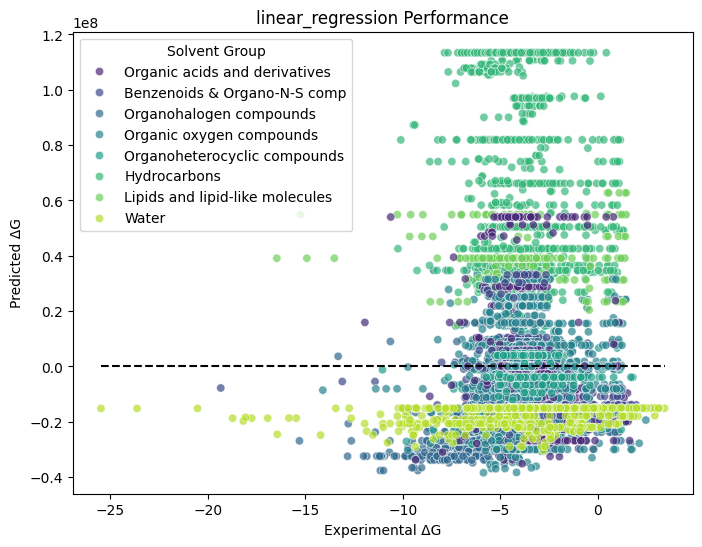

0.9483450267131234


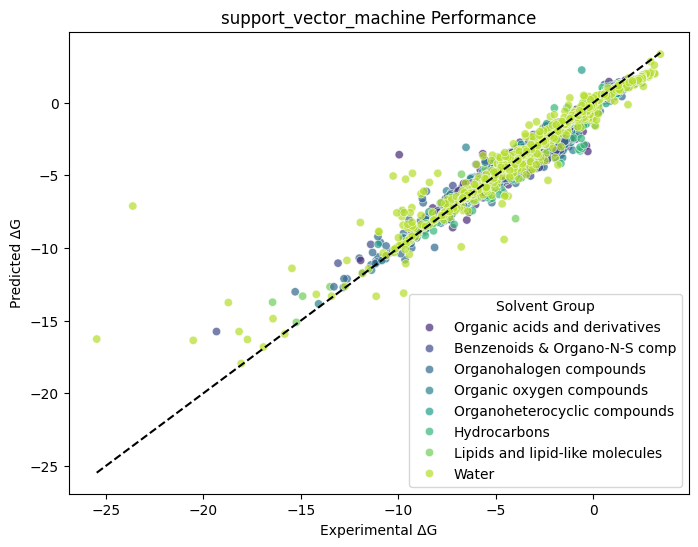

0.9874703284697444


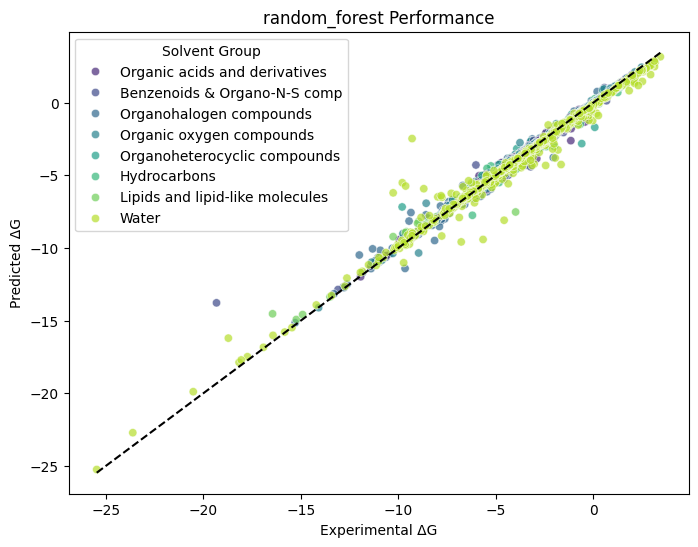

In [33]:
for model_name,model in alg_model_dict_sig_features.items():
    sig_features = model_sig_features_dict[model_name]
    #model = alg_model_dict_sig_features[model_name]
    y_pred = model.predict(X_scaled[sig_features])
    print(model.score(X_scaled[sig_features],y))
    #print(y_pred)
    visualize(y_pred,model_name)

In [38]:

X_scaled = X.copy()
X_scaled[numeric_col] = scaler.transform(X[numeric_col])

-254158631742388.34


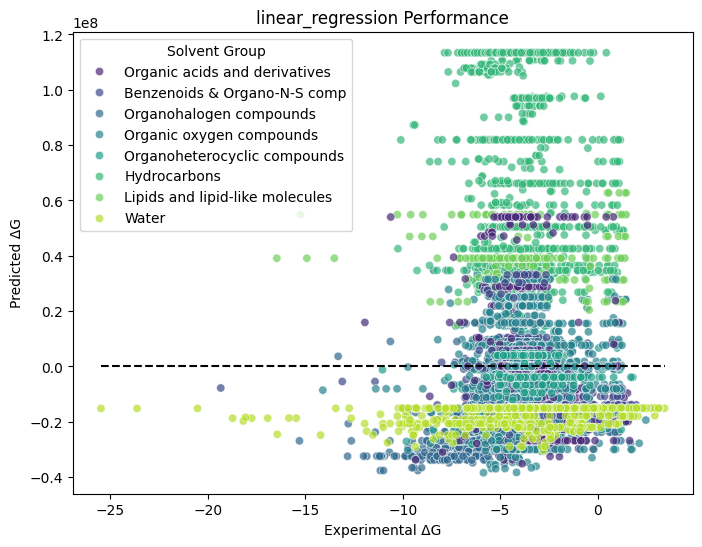

0.9483450267131234


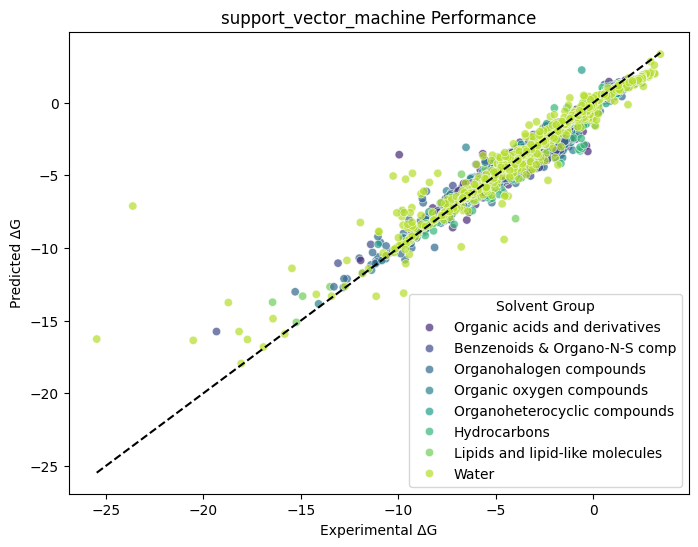

0.9874703284697444


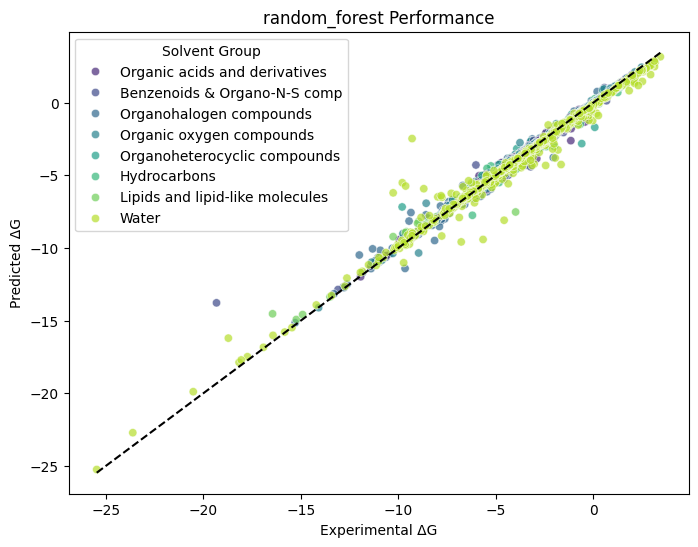

In [39]:
for model_name in model_sig_features_dict.keys():
    sig_features = model_sig_features_dict[model_name]
    model = alg_model_dict_sig_features[model_name]
    y_pred = model.predict(X_scaled[sig_features])
    print(model.score(X_scaled[sig_features],y))
    #print(y_pred)
    visualize(y_pred,model_name)
    

In [25]:
sig_features_rf = model_sig_features_dict['random_forest']

In [36]:
len(sig_features_rf)

156

In [28]:
#since random forest seems to be the best model, lets visualize only on that

def visualize(y_pred,model_name):
    df = pd.DataFrame({
    'Experimental ΔG': y,
    'Predicted ΔG': y_pred,
    'Solvent Group': df_fillna['Solvent_Type'].to_list() })
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='Experimental ΔG', y='Predicted ΔG', hue='Solvent Group', palette='viridis', alpha=0.7)
    #x=y line 
    plt.plot([df['Experimental ΔG'].min(), df['Experimental ΔG'].max()], 
             [df['Experimental ΔG'].min(), df['Experimental ΔG'].max()], 
             linestyle='--', color='black')
    
    plt.xlabel('Experimental ΔG')
    plt.ylabel('Predicted ΔG')
    plt.title(f'{model_name} Performance')
    plt.legend(title='Solvent Group')
    
    plt.show()

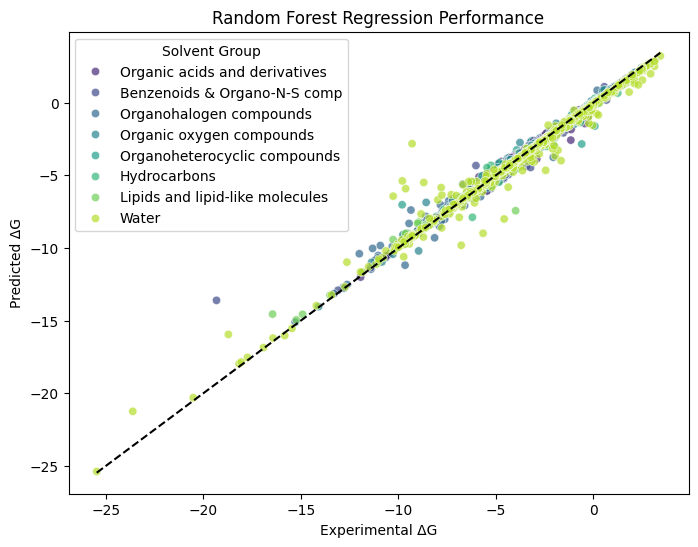

In [44]:
# to check with random forest trained on test set from Q2 with all features
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = rf_model.predict(X_scaled)


import pandas as pd
df = pd.DataFrame({
    'Experimental ΔG': y,
    'Predicted ΔG': y_pred,
    'Solvent Group': df_fillna['Solvent_Type'].to_list()  
})


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Experimental ΔG', y='Predicted ΔG', hue='Solvent Group', palette='viridis', alpha=0.7)
#x=y line 
plt.plot([df['Experimental ΔG'].min(), df['Experimental ΔG'].max()], 
         [df['Experimental ΔG'].min(), df['Experimental ΔG'].max()], 
         linestyle='--', color='black')

plt.xlabel('Experimental ΔG')
plt.ylabel('Predicted ΔG')
plt.title('Random Forest Regression Performance')
plt.legend(title='Solvent Group')

plt.show()


**Question 6** Summarize your work and discuss what you learnt. **(5 points)**